In [50]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.decomposition import PCA, KernelPCA

import torch
import torch.nn as nn
from torchvision import transforms, datasets
%matplotlib inline

In [51]:
mnist_train = datasets.MNIST('./',train=True, download=True, transform=transforms.ToTensor())
train_loader = torch.utils.data.DataLoader(dataset=mnist_train,batch_size=1,shuffle=True)
mnist_test = datasets.MNIST('./',train=False, download=True, transform=transforms.ToTensor())
test_loader = torch.utils.data.DataLoader(dataset=mnist_train,batch_size=1,shuffle=True)

InitialData = np.zeros([10000,784])
label = np.zeros(10000)
for i in range(10000):
    if i%5000 == 0:
        print(i)
    pair = iter(train_loader).next()
    InitialData[i][:] = pair[0].view(784).cpu().numpy()
    label[i] = pair[1].cpu().numpy()

0
5000


In [52]:
pca = PCA(2, False)
X_pca = pca.fit_transform(InitialData)

In [53]:
X_pca.shape

(10000, 2)

In [54]:
List0x = []
List0y = []
List1x = []
List1y = []
List2x = []
List2y = []
List3x = []
List3y = []
List4x = []
List4y = []
List5x = []
List5y = []

for i in range(400):
    coorformat0 = X_pca[i][0]
    coorformat1 = X_pca[i][1]
    if label[i] == 0:
        List0x.append(coorformat0)
        List0y.append(coorformat1)
    if label[i] == 1:
        List1x.append(coorformat0)
        List1y.append(coorformat1)
    if label[i] == 2:
        List2x.append(coorformat0)
        List2y.append(coorformat1)
    if label[i] == 3:
        List3x.append(coorformat0)
        List3y.append(coorformat1)
    if label[i] == 4:
        List4x.append(coorformat0)
        List4y.append(coorformat1)
    if label[i] == 5:
        List5x.append(coorformat0)
        List5y.append(coorformat1)

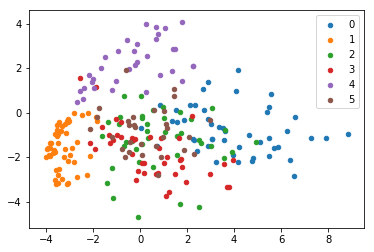

In [55]:
plt.scatter(List0x,List0y,label='0', s=20)
plt.scatter(List1x,List1y,label='1', s=20)
plt.scatter(List2x,List2y,label='2', s=20)
plt.scatter(List3x,List3y,label='3', s=20)
plt.scatter(List4x,List4y,label='4', s=20)
plt.scatter(List5x,List5y,label='5', s=20)
plt.legend()
plt.savefig('PCA.png',dpi = 300)
plt.show()

In [56]:
b = pca.inverse_transform(X_pca)

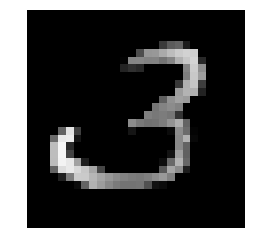

In [82]:
plt.imshow(InitialData[21].reshape([28,28]),'gray', vmin=0, vmax = 1)
plt.axis('off')
plt.savefig('PCAdigits.png',interpolation = 'Nearest' ,dpi = 300)

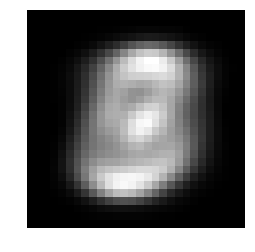

In [63]:
plt.imshow(b[50].reshape([28,28]),'gray')
plt.axis('off')
plt.savefig('PCArecon.png',dpi = 300)